# Problem 2: German Credit Dataset (72 points)

Given a CSV data file as represented by the sample file GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it.

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('GermanCredit.csv')

# Print the DataFrame
print(df)

    checking_status  duration                    credit_history  \
0              '<0'         6  'critical/other existing credit'   
1        '0<=X<200'        48                   'existing paid'   
2     'no checking'        12  'critical/other existing credit'   
3              '<0'        42                   'existing paid'   
4              '<0'        24              'delayed previously'   
..              ...       ...                               ...   
995   'no checking'        12                   'existing paid'   
996            '<0'        30                   'existing paid'   
997   'no checking'        12                   'existing paid'   
998            '<0'        45                   'existing paid'   
999      '0<=X<200'        45  'critical/other existing credit'   

                 purpose  credit_amount      savings_status  employment  \
0               radio/tv           1169  'no known savings'       '>=7'   
1               radio/tv           5951      

1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [2]:
# Find the columns with the highest number of non-zero 'none' values
columns_to_drop = df.eq('none').sum().nlargest(3).index

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print(df)

    checking_status  duration                    credit_history  \
0              '<0'         6  'critical/other existing credit'   
1        '0<=X<200'        48                   'existing paid'   
2     'no checking'        12  'critical/other existing credit'   
3              '<0'        42                   'existing paid'   
4              '<0'        24              'delayed previously'   
..              ...       ...                               ...   
995   'no checking'        12                   'existing paid'   
996            '<0'        30                   'existing paid'   
997   'no checking'        12                   'existing paid'   
998            '<0'        45                   'existing paid'   
999      '0<=X<200'        45  'critical/other existing credit'   

                 purpose  credit_amount      savings_status  employment  \
0               radio/tv           1169  'no known savings'       '>=7'   
1               radio/tv           5951      

2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [3]:
df = df.replace("'", "", regex=True)

print(df)

    checking_status  duration                  credit_history  \
0                <0         6  critical/other existing credit   
1          0<=X<200        48                   existing paid   
2       no checking        12  critical/other existing credit   
3                <0        42                   existing paid   
4                <0        24              delayed previously   
..              ...       ...                             ...   
995     no checking        12                   existing paid   
996              <0        30                   existing paid   
997     no checking        12                   existing paid   
998              <0        45                   existing paid   
999        0<=X<200        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   


3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [4]:
df['checking_status'] = df['checking_status'].replace({'no checking': 'No Checking', '<0': 'Low', '0<=X<200': 'Medium', '>=200': 'High'})

print(df)

    checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   


4. [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [5]:
df['savings_status'] = df['savings_status'].replace({'no known savings': 'No Savings', '<100': 'Low', '100<=X<500': 'Medium', '500<=X<1000': 'High', '>=1000': 'High'})

print(df)

    checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv           1169     No Savings         >=7   
1               radio/tv           5951            Low      1<=X<4   
2        

5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.

In [6]:
df['class'] = df['class'].replace({'good': '1', 'bad': '0'})

print(df)

    checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv           1169     No Savings         >=7   
1               radio/tv           5951            Low      1<=X<4   
2        

6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [7]:
df['employment'] = df['employment'].replace({'unemployed': 'Unemployed', '1<=X<4': 'Professional', '>=7': 'Expert', '4<=X<7': 'Experienced', '<1': 'Amateur'})

print(df)

    checking_status  duration                  credit_history  \
0               Low         6  critical/other existing credit   
1            Medium        48                   existing paid   
2       No Checking        12  critical/other existing credit   
3               Low        42                   existing paid   
4               Low        24              delayed previously   
..              ...       ...                             ...   
995     No Checking        12                   existing paid   
996             Low        30                   existing paid   
997     No Checking        12                   existing paid   
998             Low        45                   existing paid   
999          Medium        45  critical/other existing credit   

                 purpose  credit_amount savings_status    employment  \
0               radio/tv           1169     No Savings        Expert   
1               radio/tv           5951            Low  Professional   
2  

1. [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [8]:
cross_tab = pd.crosstab(df['foreign_worker'], df['class'])

print(cross_tab)

class             0    1
foreign_worker          
no                4   33
yes             296  667


b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.

In [9]:
cross_tab = pd.crosstab(df['employment'], df['savings_status'])

print(cross_tab)

savings_status  High  Low  Medium  No Savings
employment                                   
Amateur           12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12


2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [10]:
average_credit_amount = df[(df['employment'] == 'Experienced') & (df['personal_status'] == 'male single')]['credit_amount'].mean()

print(average_credit_amount)

4142.592592592592


3. [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [11]:
average_credit_duration = df.groupby('job')['duration'].mean()

print(average_credit_duration)

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64


4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:
    Most common checking status: ...
    Most common savings status: ...

In [12]:
education_data = df[df['purpose'] == 'education']
most_common_checking_status = education_data['checking_status'].mode().values[0]
most_common_savings_status = education_data['savings_status'].mode().values[0]

print("Most common checking status:", most_common_checking_status)
print("Most common savings status:", most_common_savings_status)

Most common checking status: No Checking
Most common savings status: Low


1. [9 pts] Plot subplots of two bar charts: one for savings_status (x-axis) and the other for checking_status (x-axis). In each chart, the y-axis represents number of people. Moreover, for each category of saving_status (checking_status), we need you to display four bars, each corresponding to one of the "personal_status" categories. Each personal status category bar should be of a different color.

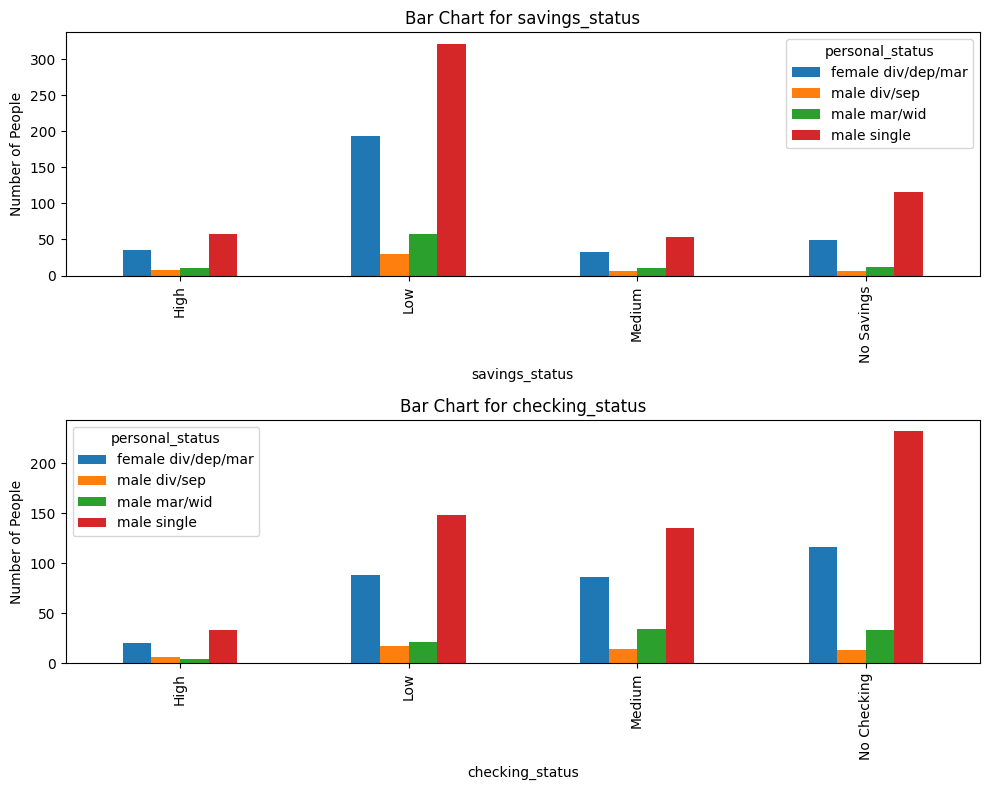

In [13]:
import matplotlib.pyplot as plt

# Group the data by savings_status and personal_status
savings_status_grouped = df.groupby(['savings_status', 'personal_status']).size().unstack()
checking_status_grouped = df.groupby(['checking_status', 'personal_status']).size().unstack()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the bar chart for savings_status
savings_status_grouped.plot(kind='bar', ax=axes[0])
axes[0].set_title('Bar Chart for savings_status')
axes[0].set_xlabel('savings_status')
axes[0].set_ylabel('Number of People')

# Plot the bar chart for checking_status
checking_status_grouped.plot(kind='bar', ax=axes[1])
axes[1].set_title('Bar Chart for checking_status')
axes[1].set_xlabel('checking_status')
axes[1].set_ylabel('Number of People')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

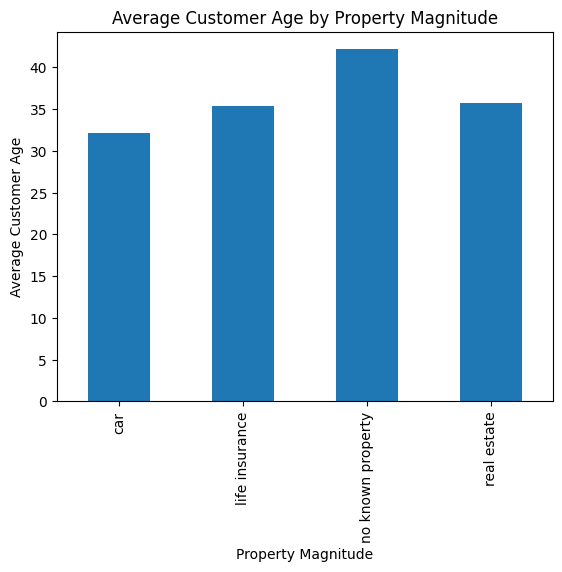

In [14]:
import matplotlib.pyplot as plt

# Filter the dataframe for credit_amount > 4000
filtered_df = df[df['credit_amount'] > 4000]

# Group the filtered data by property_magnitude and calculate the average customer age
average_age_by_magnitude = filtered_df.groupby('property_magnitude')['age'].mean()

# Plot the bar graph
average_age_by_magnitude.plot(kind='bar')
plt.title('Average Customer Age by Property Magnitude')
plt.xlabel('Property Magnitude')
plt.ylabel('Average Customer Age')

# Show the plot
plt.show()

3. [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
Personal status
Credit history
Job

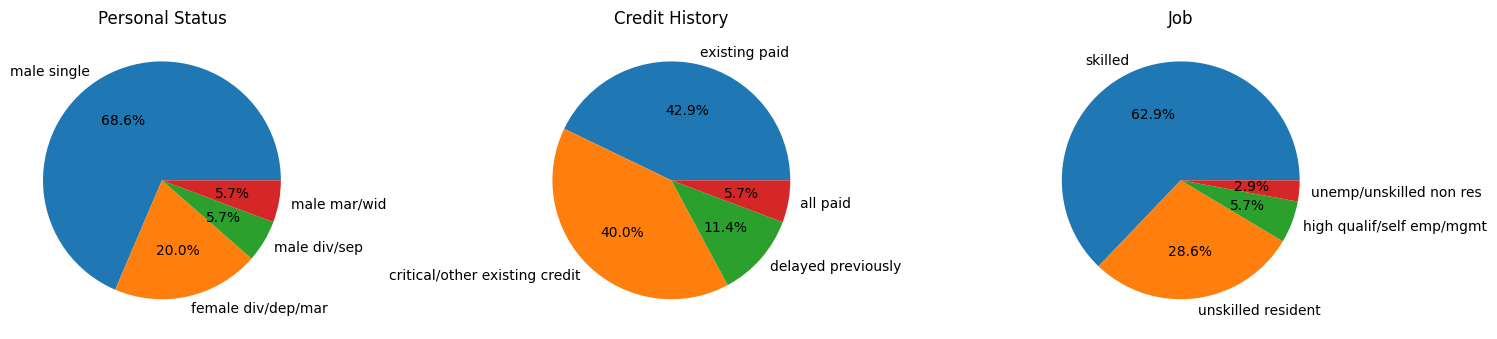

In [15]:
import matplotlib.pyplot as plt

# Filter the dataframe for people with "High" savings_status and age above 40
filtered_df = df[(df['savings_status'] == 'High') & (df['age'] > 40)]

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the pie chart for personal status
personal_status_counts = filtered_df['personal_status'].value_counts()
axes[0].pie(personal_status_counts, labels=personal_status_counts.index, autopct='%1.1f%%')
axes[0].set_title('Personal Status')

# Plot the pie chart for credit history
credit_history_counts = filtered_df['credit_history'].value_counts()
axes[1].pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%')
axes[1].set_title('Credit History')

# Plot the pie chart for job
job_counts = filtered_df['job'].value_counts()
axes[2].pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
axes[2].set_title('Job')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()